In [1]:
###############################################################
# Analyza la serie de incidencia de cancer en 
# Europa por typo de cancer, rango de edad y sexo ​
# en el periodo de 2007 a 2017 print
###############################################################
import pandas as pd
import numpy as np
import warnings
import os
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose # for decomposition
from scipy.stats import boxcox, normaltest, shapiro # for transformation and normality
import statsmodels.api as sm
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid
import statsmodels
import functions_ts
import Jorge
import keneth
import importlib

importlib.reload(functions_ts)
importlib.reload(Jorge)
importlib.reload(keneth)

C:\Users\daniel.fernand.ext\AppData\Local\anaconda3\envs\temporada_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


<module 'keneth' from 'C:\\Users\\daniel.fernand.ext\\Documents\\GitHub\\Europe_Cancer_Incidence\\src\\data\\keneth.py'>

In [2]:
# Obtener el directorio del script

script_dir = Path.cwd()
project_root = script_dir.parent.parent
print(script_dir)

file_path = project_root/ 'data' / 'processed' / 'EQUIPO5.csv'



C:\Users\daniel.fernand.ext\Documents\GitHub\Europe_Cancer_Incidence\src\data


In [3]:
print(file_path)

C:\Users\daniel.fernand.ext\Documents\GitHub\Europe_Cancer_Incidence\data\processed\EQUIPO5.csv


In [14]:
ts_equipo = pd.read_csv(file_path)

#Conversión de datos
ts_equipo['ds'] = pd.to_datetime(ts_equipo['ds'],format = '%d/%m/%Y')

In [15]:
print(ts_equipo)

            ds   y
0   2024-01-02  27
1   2024-01-03  29
2   2024-01-04  26
3   2024-01-05  25
4   2024-01-08  20
..         ...  ..
461 2025-11-13  41
462 2025-11-14  39
463 2025-11-17  40
464 2025-11-18  38
465 2025-11-19  38

[466 rows x 2 columns]


<Figure size 1000x400 with 0 Axes>

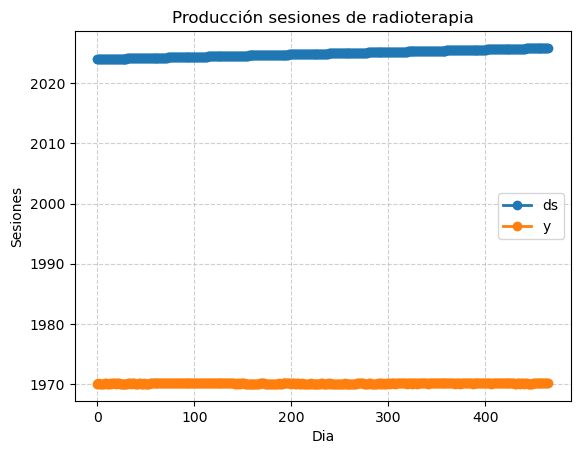

In [16]:
#============================================================================
# 2.-Visualización inicialInitial visualization
#============================================================================

functions_ts.plot_serie(ts_equipo, "Producción sesiones de radioterapia",'Dia', 'Sesiones')

In [17]:
modelo1 = Prophet(
    growth = 'linear',
    yearly_seasonality = True,
    weekly_seasonality = True, 
    daily_seasonality  = True,
    seasonality_mode   = 'additive',
    changepoint_prior_scale = 0.05, 
    seasonality_prior_scale = 10.0,
    interval_width = 0.95,
    uncertainty_samples = 1000
)

In [18]:
modelo1.fit(ts_equipo)

14:44:22 - cmdstanpy - INFO - Chain [1] start processing
14:44:23 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
futuro1 = modelo1.make_future_dataframe(periods = 30, freq = 'D')
forecast1 = modelo1.predict(futuro1)

In [21]:
print(forecast1)

            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2024-01-02  28.078684   10.840461   37.879973    28.078684    28.078684   
1   2024-01-03  28.066165    9.779148   36.795448    28.066165    28.066165   
2   2024-01-04  28.053646    7.940836   36.849092    28.053646    28.053646   
3   2024-01-05  28.041127    8.396612   35.743659    28.041127    28.041127   
4   2024-01-08  28.003570    8.884844   36.897456    28.003570    28.003570   
..         ...        ...         ...         ...          ...          ...   
491 2025-12-15  35.273547   19.707801   47.272160    35.176168    35.387579   
492 2025-12-16  35.317415   20.971918   49.454698    35.215821    35.436857   
493 2025-12-17  35.361283   19.415826   49.256130    35.253891    35.487469   
494 2025-12-18  35.405151   19.830465   48.124701    35.289618    35.540043   
495 2025-12-19  35.449019   17.884650   47.411748    35.328270    35.593298   

     additive_terms  additive_terms_lower  additive

In [22]:
print(forecast1.tail(30))

            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
466 2025-11-20  34.176846   23.559457   51.353393    34.176846    34.176846   
467 2025-11-21  34.220714   20.834930   49.609090    34.220100    34.221420   
468 2025-11-22  34.264582   21.854129   49.609575    34.262740    34.266618   
469 2025-11-23  34.308450   20.523436   49.833103    34.305353    34.312440   
470 2025-11-24  34.352318   22.011657   48.837671    34.346938    34.359641   
471 2025-11-25  34.396186   24.106265   50.639215    34.388002    34.407021   
472 2025-11-26  34.440054   22.097817   50.128170    34.429737    34.453656   
473 2025-11-27  34.483922   20.111891   49.467401    34.471208    34.500094   
474 2025-11-28  34.527790   20.172595   48.347584    34.512870    34.547203   
475 2025-11-29  34.571658   20.852349   48.875553    34.553340    34.594693   
476 2025-11-30  34.615526   19.347239   48.489556    34.594611    34.644100   
477 2025-12-01  34.659395   20.486367   47.656737   